## Exercise 08: 
# Bounded confidence model: analysis of consensus and bias

You will implement the three variants (pairwise, symmetric group influence, and asymmetric group influence) of the bounded confidence model, and visualise the dynamics of collective opinions and its variations according to the model's parameters.
The description of the model can be found in the slides of Lecture 3.1.

In [1]:
%reload_ext autoreload
%autoreload 2

## Task 1: Pairwise 

Complete the `BoundedConfidenceModel` class by adding the pairwise interactions in the `step` method.
Check the `BoundedConfidenceAgent` class to understand which attributes needs to be updated.

## Taks 2: Simulate pairwise interactions

Create a plot function for showing the evolution of opinions over time.
Note that datacollector in `BoundedConfidenceModel` is collecting "Opinion" of each agent and by using  `get_agent_vars_dataframe` we can obtain the data in a dataframe with indices "AgentID" and "Step". Simulate the model for 30 agents and 500 steps.

In [2]:
import matplotlib.pyplot as plt
from model import BoundedConfidenceModel

In [3]:
def plot(opinions):
    """ Plot opinion dynamics of all agents 

    Args:
        opinions: a dataframe of three columns ["Step", "AgentID", "Opinion"]
    """
    timesteps = opinions["Step"].unique()
    agent_ids = opinions["AgentID"].unique()

    # plot each agent's opinion evolution against time steps
    for i in agent_ids:
        opinions_i = opinions.loc[opinions.loc[:,
                                               "AgentID"] == i, :]["Opinion"].values
        color = opinions_i[0]
        plt.plot(timesteps, opinions_i, "-", alpha=0.3,
                 color=plt.get_cmap('rainbow')(color))
    plt.show()

In [10]:
def task2():
    model = BoundedConfidenceModel(num_agents=30, epsilon=0.2, mu=0.5, model_type="pairwise", max_steps=500)
    model.run_model()
    opinions = model.datacollector.get_agent_vars_dataframe().reset_index()
    plot(opinions)

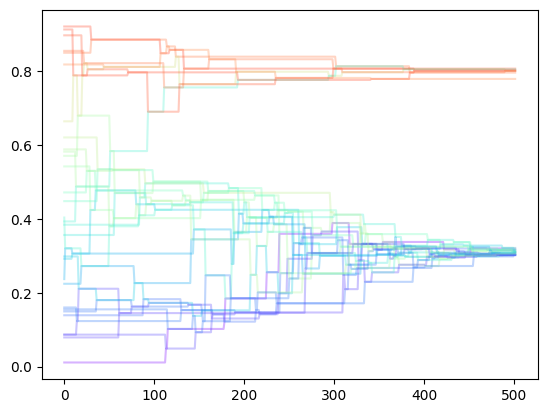

In [11]:
task2()

## Task 3: Symmetric group influence 

In order to simulate this model, you need to implement the `step` and `advance` methods in the `BoundedConfidenceAgent` class.
You can use the equations the slides, and set $\mu=1$, $\epsilon=0.15$/$0.25$, num_agents $=500$, max_steps $=15$ to obtain either three or two peaks.

In [12]:
def task3():
    model = BoundedConfidenceModel(num_agents=500, epsilon=0.15, mu=1, model_type="group symmetric", max_steps=15)
    model.run_model()
    opinions = model.datacollector.get_agent_vars_dataframe().reset_index()
    plot(opinions)

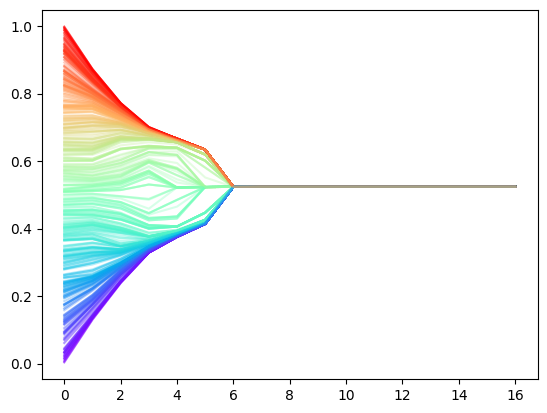

In [13]:
task3()

## Task 4: Asymmetric group influence 

Revise the `step` method in the `BoundedConfidenceAgent` class so that it models the interaction dynamics for the case `model_type == "group asymmetric"` as well.
For this case the agent can have two different $\epsilon$, e.g. right or left-wing preferences. 
Set $\mu=0.5$, $\epsilon_{left}=0.1$, $\epsilon_{right}=0.25$, num_agents $=500$, max_steps $=15$ in order to obtain two peaks. Run the model for 500 agents and 15 steps.

In [25]:
def task4():
    model = BoundedConfidenceModel(num_agents=500, epsilon=[0.1, 0.25], mu=0.5, \
                                   model_type="group asymmetric", max_steps=15)
    model.run_model()
    opinions = model.datacollector.get_agent_vars_dataframe().reset_index()
    plot(opinions)

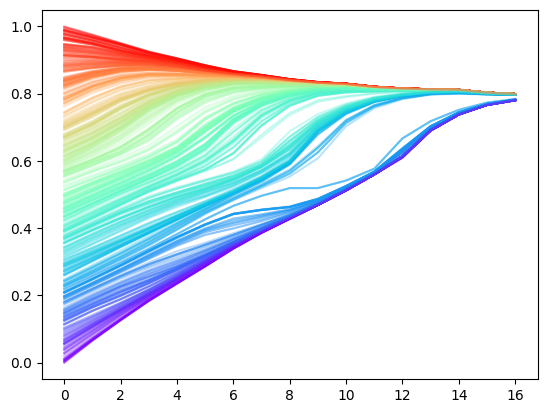

In [27]:
task4()